# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

In [3]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from skimage import exposure, img_as_float
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
from skimage.color import rgb2gray # useful to transform rbg images to gray
from matplotlib.pyplot import figure
import scipy.ndimage

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 16th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

a) Read the image "face.png" and visualize the RGB image as well as each of its channels separately (R, G, and B).

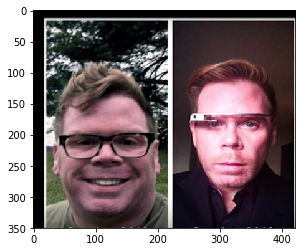

In [4]:
# The Face image is loaded
face = plt.imread('images/face.png')

# The three colour channels are split
face_r = face[:,:,0]
face_g = face[:,:,1]
face_b = face[:,:,2]

# The image is shown
plt.imshow(face)
plt.show()

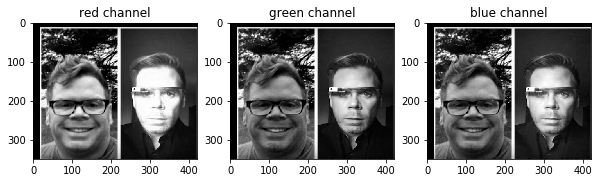

In [9]:
# The structure for the subplots is created
f, axarr = plt.subplots(ncols=3, nrows=1,figsize=(10,5))

# The first image settings are defined
axarr[0].imshow(face_r, cmap='gray')
axarr[0].set_title('red channel')

# The second image settings are defined
axarr[1].imshow(face_g, cmap='gray')
axarr[1].set_title('green channel')

# The third image settings are defined
axarr[2].imshow(face_b, cmap='gray')
axarr[2].set_title('blue channel')

# The image is shown
plt.show()

b) Visualize the histogram of the image. What is the histogram representing for an image? 
The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

    - Obtain the histogram with 8 and 32 bins. 

    - Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

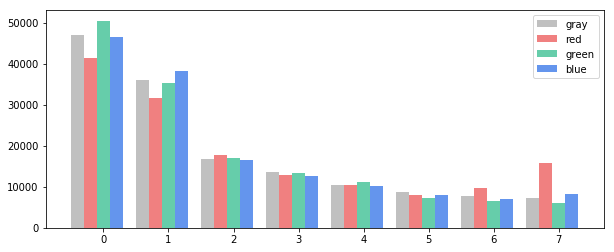

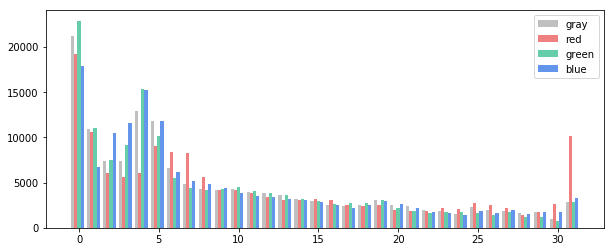

'\nWhat does the image represent? \n    - It shows the number of pixels by their values of colurs. So if a red bin is really high at the right side,\n    it means that there are a lot of pixels that have a high red colour.\n'

In [6]:
def histograms(face):
    # First, the figure function is used
    figure(num=None, figsize=(10, 4))
    
    # The histograms of the three colour channels are obtained
    histR,binsR = exposure.histogram(face[:,:,0], nbins=8)
    histG,binsG = exposure.histogram(face[:,:,1], nbins=8)
    histB,binsB = exposure.histogram(face[:,:,2], nbins=8)

    # The histogram of the gray channel is obtained
    face_gray = rgb2gray(face)
    histGr,binsGr = exposure.histogram(face_gray, nbins=8)
    
    # The bars are set up so they don't collide
    plt.bar([i-0.4 for i in range(len(binsGr))], histGr, color='silver',width= 0.2)
    plt.bar([i-0.2 for i in range(len(binsR))], histR, color='lightcoral', width= 0.2)
    plt.bar([i for i in range(len(binsB))], histG, color='mediumaquamarine',width= 0.2)
    plt.bar([i+0.2 for i in range(len(binsG))], histB, color='cornflowerblue',width= 0.2)

    # The legend is plotted
    plt.legend(['gray', 'red', 'green', 'blue'])
    plt.show()
    
    # Again, the same process with 32 bins
    # First, the figure function is used
    figure(num=None, figsize=(10, 4))

    # The histograms of the three colour channels are obtained
    histR,binsR = exposure.histogram(face[:,:,0], nbins=32)
    histG,binsG = exposure.histogram(face[:,:,1], nbins=32)
    histB,binsB = exposure.histogram(face[:,:,2], nbins=32)

    # The histogram of the gray channel is obtained
    face_gray = rgb2gray(face)
    histGr,binsGr = exposure.histogram(face_gray, nbins=32)

    # The bars are set up so they don't collide
    plt.bar([i-0.4 for i in range(len(binsGr))], histGr, color='silver',width= 0.2)
    plt.bar([i-0.2 for i in range(len(binsR))], histR, color='lightcoral', width= 0.2)
    plt.bar([i for i in range(len(binsB))], histG, color='mediumaquamarine',width= 0.2)
    plt.bar([i+0.2 for i in range(len(binsG))], histB, color='cornflowerblue',width= 0.2)

    # The legend is plotted
    plt.legend(['gray', 'red', 'green', 'blue'])
    plt.show()

histograms(face)

'''
What does the image represent? 
    - It shows the number of pixels by their values of colurs. So if a red bin is really high at the right side,
    it means that there are a lot of pixels that have a high red colour.
'''

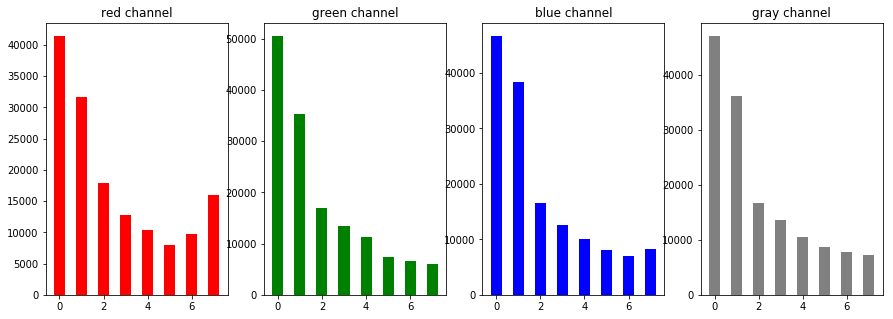


Comment their differences
    - We see that the red channel after the 5th bin starts rising again, meaning that there are a decent number 
    of pixels that have high red values. 
    - We can also see that the green channel is the less present in the pictures, given how the first bin
    is the highest of the three.



In [11]:
# The histograms of the three colour channels are obtained
histR,binsR = exposure.histogram(face[:,:,0], nbins=8)
histG,binsG = exposure.histogram(face[:,:,1], nbins=8)
histB,binsB = exposure.histogram(face[:,:,2], nbins=8)

# The histogram of the gray channel is obtained
face_gray = rgb2gray(face)
histGr,binsGr = exposure.histogram(face_gray, nbins=8)

f, axarr = plt.subplots(ncols=4, nrows=1,figsize=(15,5))

# The first plot settings are defined
axarr[0].bar([i for i in range(len(binsB))], histR, color='red',width= 0.5)
axarr[0].set_title('red channel')

# The second plot settings are defined
axarr[1].bar([i for i in range(len(binsB))], histG, color='green',width= 0.5)
axarr[1].set_title('green channel')

# The third plot settings are defined
axarr[2].bar([i for i in range(len(binsB))], histB, color='blue',width= 0.5)
axarr[2].set_title('blue channel')

# The fourth plot settings are defined
axarr[3].bar([i for i in range(len(binsB))], histGr, color='gray',width= 0.5)
axarr[3].set_title('gray channel')

# The image is shown
plt.show()


solution = '''
Comment their differences
    - We see that the red channel after the 5th bin starts rising again, meaning that there are a decent number 
    of pixels that have high red values. 
    - We can also see that the green channel is the less present in the pictures, given how the first bin
    is the highest of the three.
'''
print(solution)

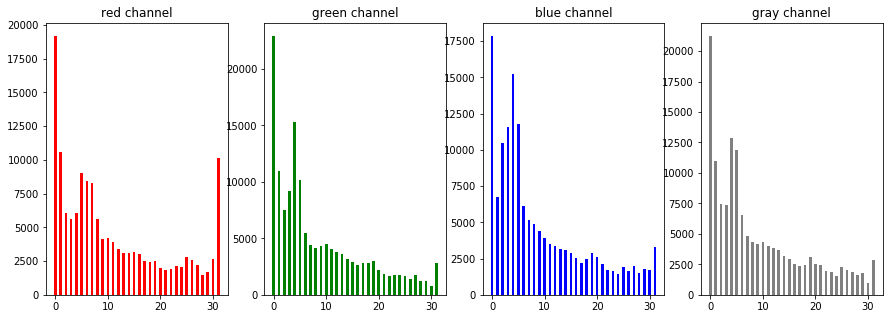


Comment their differences:
    - We see the same situation as before (because it is the same image) but with more detail. 



In [12]:
# The histograms of the three colour channels are obtained
histR,binsR = exposure.histogram(face[:,:,0], nbins=32)
histG,binsG = exposure.histogram(face[:,:,1], nbins=32)
histB,binsB = exposure.histogram(face[:,:,2], nbins=32)

# The histogram of the gray channel is obtained
face_gray = rgb2gray(face)
histGr,binsGr = exposure.histogram(face_gray, nbins=32)

f, axarr = plt.subplots(ncols=4, nrows=1,figsize=(15,5))

# The first plot settings are defined
axarr[0].bar([i for i in range(len(binsB))], histR, color='red',width= 0.5)
axarr[0].set_title('red channel')

# The second plot settings are defined
axarr[1].bar([i for i in range(len(binsB))], histG, color='green',width= 0.5)
axarr[1].set_title('green channel')

# The third plot settings are defined
axarr[2].bar([i for i in range(len(binsB))], histB, color='blue',width= 0.5)
axarr[2].set_title('blue channel')

# The fourth plot settings are defined
axarr[3].bar([i for i in range(len(binsB))], histGr, color='gray',width= 0.5)
axarr[3].set_title('gray channel')

# The image is shown
plt.show()

solution = '''
Comment their differences:
    - We see the same situation as before (because it is the same image) but with more detail. 
'''
print(solution)

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `face.png` and apply each of the following steps:

1. Convert it to grayscale with the function `color.rgb2gray()` of the package `skimage`.
2. Convolve it with a horizontal mask `mask_h1d=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]` using the function `ndimage.convolve()` of the package `scipy`.
3. Convolve the original image (1) with a transposed version of the mask in (2).
4. Convolve the original image (1) with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

**Visualize the output of each step (1 to 4) next to each other. Write short titles on each figure to make them understandable.**

#### Questions

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Note: Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).

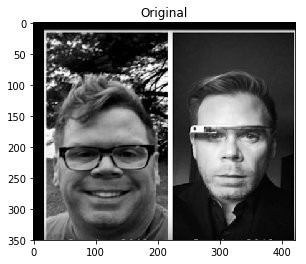

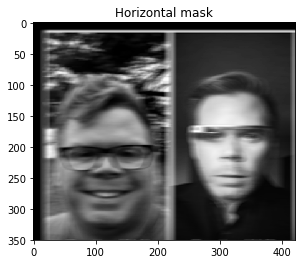

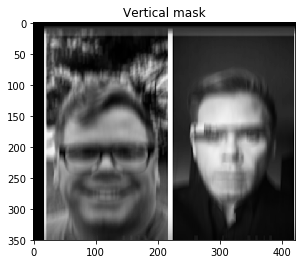

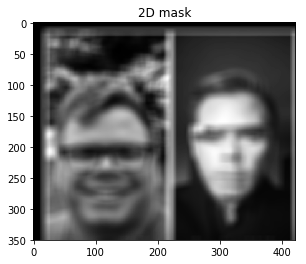

In [13]:
# The image is loaded
face = plt.imread('images/face.png')

# The image is transformed to grayscale
face_gray = rgb2gray(face)

# The image is shown with title 'Original'
plt.imshow(face_gray, cmap='gray')
plt.title('Original')
plt.show()

# The horizontal mask is created
mask_h1d = [[1]*15]

# The mask is applied to the image
horizontal_mask = scipy.ndimage.convolve(face_gray, mask_h1d)

# The image is shown
plt.imshow(horizontal_mask, cmap='gray')
plt.title('Horizontal mask')
plt.show()

# The vertical mask is created
mask_v1d = [[1]]*15

# The mask is applied to the image
vertical_mask = scipy.ndimage.convolve(face_gray, mask_v1d)

# The image is shown
plt.imshow(vertical_mask, cmap='gray')
plt.title('Vertical mask')
plt.show()

# The matrix mask is created
mask_2d = [[1]*15]*15

# The mask is applied to the image
twod_mask = scipy.ndimage.convolve(face_gray, mask_2d)

# The image is shown
plt.imshow(twod_mask, cmap='gray')
plt.title('2D mask')
plt.show()

b) Given a color image (im), what is the difference between ***1*** and ***2*** ?
   
*** 1. ***

im_2=np.array(im, dtype='float')


*** 2. ***

im_2=np.array(im)


im_2=img_as_float(im_2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


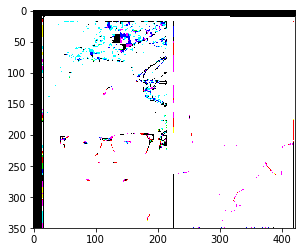

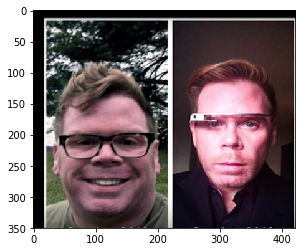


- In this case, face_2 has values from 0 to 255 and when we show it, the program knows that we are passing
floats so it belives that values will be from 0 to 1. That's why almost all pixels are white, because the
big majority of pixels have values > 1.

Side note: if we load the image with plt.imread() the result of both images is exactly the same



In [11]:
# The Face image is loaded
face = io.imread('images/face.png')

face_2 = np.array(face, dtype='float')

face_3 = np.array(face)
face_3 = img_as_float(face_3)

plt.imshow(face_2)
plt.show()

plt.imshow(face_3)
plt.show()

solution = '''
- In this case, face_2 has values from 0 to 255 and when we show it, the program knows that we are passing
floats so it belives that values will be from 0 to 1. That's why almost all pixels are white, because the
big majority of pixels have values > 1.

Side note: if we load the image with plt.imread() the result of both images is exactly the same
'''
print(solution)

c) Can we convolve a color (RGB) image? In order to convolve an RGB each of the channels must be convolved separately.

Implement a function that applies a 3-channel filter and visualize its result on `face.png` with a 15x15 uniform mask.

Which is the result obtained when applying a single-channel filter channel by channel separately?

In [15]:
def convolve_rgb(image, show_channels=True):
    
    # The three channels are separated
    image_r = image[:,:,0]
    image_g = image[:,:,1]
    image_b = image[:,:,2]
    
    # The mask is created
    mask = [[1/15**2]*15]*15
    
    # The mask is applied to every channel
    r_mask = scipy.ndimage.convolve(image_r, mask)
    g_mask = scipy.ndimage.convolve(image_g, mask)
    b_mask = scipy.ndimage.convolve(image_b, mask)
    
    # The channels are set to the masked channel
    image[:,:,0] = r_mask
    image[:,:,1] = g_mask
    image[:,:,2] = b_mask
    
    # The image is shown
    plt.imshow(image)
    plt.show()
    
    # If the show_channels variable is set to True
    if show_channels:
        # The structure for the subplots is created
        f, axarr = plt.subplots(ncols=3, nrows=1,figsize=(10,5))

        # The first image settings are defined
        axarr[0].imshow(r_mask, cmap='gray')
        axarr[0].set_title('red channel')

        # The second image settings are defined
        axarr[1].imshow(g_mask, cmap='gray')
        axarr[1].set_title('green channel')

        # The third image settings are defined
        axarr[2].imshow(b_mask, cmap='gray')
        axarr[2].set_title('blue channel')

        # The image is shown
        plt.show()

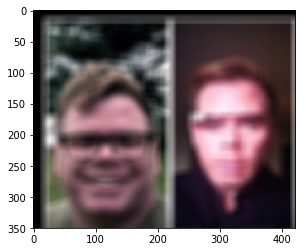

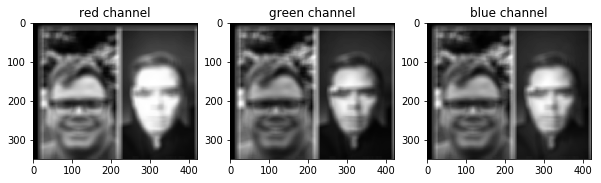

In [16]:
# The convolution is applied to te face image 
face = plt.imread('images/face.png')
convolve_rgb(face)

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce it 10 times
2. Augment it 10 times. 
3. Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why.

Note: Use the command `resize` to change the size of the images.


C:\Users\Xavier\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Xavier\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


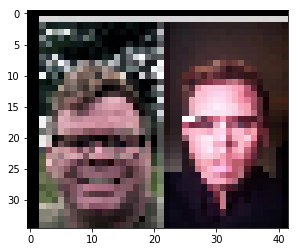

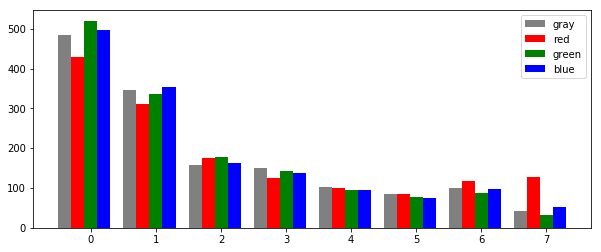

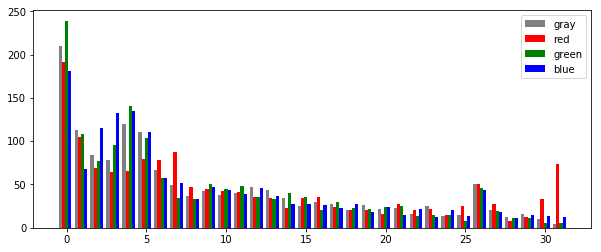

In [17]:
from skimage.transform import resize
face = plt.imread('images/face.png')
face_small = resize(face, (int(face.shape[0]/10), int(face.shape[1]/10)))
plt.imshow(face_small)
plt.show()
histograms(face_small)

In [18]:
solution = '''
- We can see that at first sight it remains the same way as before, but some little things have changed, for
example, the 26th bin is way bigger than before
'''
print(solution)


- We can see that at first sight it remains the same way as before, but some little things have changed, for
example, the 26th bin is way bigger than before



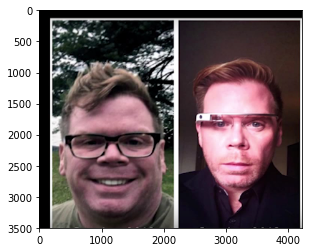

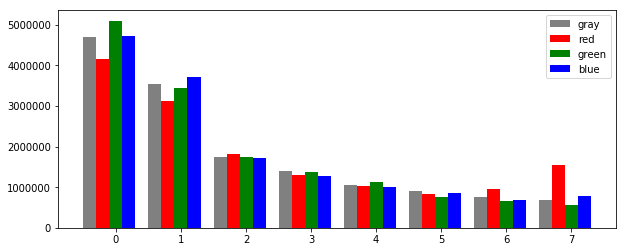

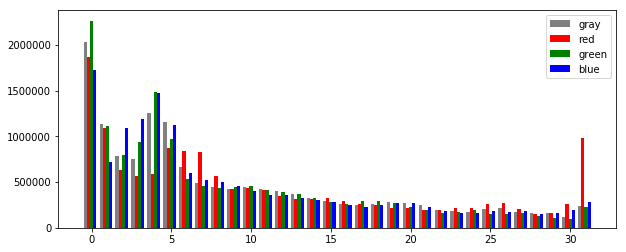

In [19]:
face_big = resize(face, (int(face.shape[0]*10), int(face.shape[1]*10)))
plt.imshow(face_big)
plt.show()
histograms(face_big)

In [20]:
solution = '''
- In this case we can say that the histogram is exactly the same, but with the vertical axis multipied by 10.
It is the same histogram because the resize function justreplicates every pixel 10 times in every direction.
'''
print(solution)


- In this case we can say that the histogram is exactly the same, but with the vertical axis multipied by 10.
It is the same histogram because the resize function justreplicates every pixel 10 times in every direction.



b) Apply a convolution (15x15 uniform mask) on the resized images and compare the results.

1. Convolve the original image.
2. Convolve the image reduced 10 times.
3. Convolve the image augmented 10 times.

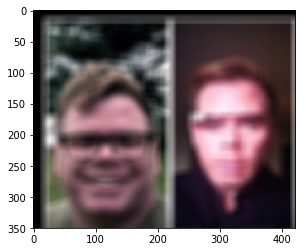

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


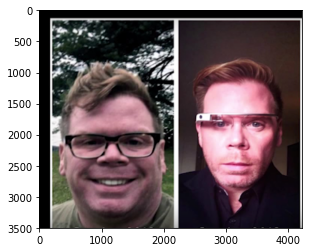

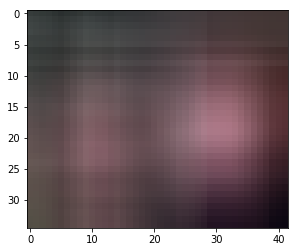

In [21]:
convolve_rgb(face, False)
convolve_rgb(face_big, False)
convolve_rgb(face_small, False)

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `face.png`:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: search for the skimage.filters function for creating the different filters.

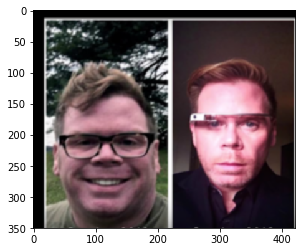

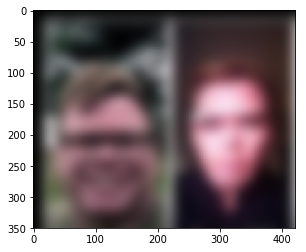

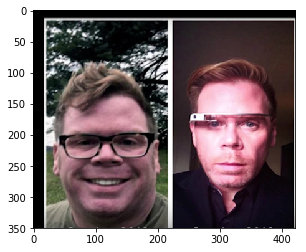

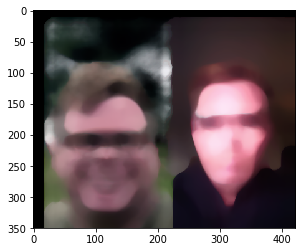

In [22]:
# Some functions are imported
from skimage.filters import gaussian, median
from skimage.morphology import disk

# The image is loaded
face = io.imread('images/face.png')

# A copy of the image is created
face_median = face.copy()

# The gaussian kernel with sigma=1 is applied and shown
conv_sigma_1 = gaussian(face, sigma=1, multichannel=True)
plt.imshow(conv_sigma_1)
plt.show()

# The gaussian kernel with sigma=10 is applied and shown
conv_sigma_10 = gaussian(face, sigma=10, multichannel=True)
plt.imshow(conv_sigma_10)
plt.show()

# The gaussian kernel with sigma=0.1 is applied and shown
conv_sigma_0_1 = gaussian(face, sigma=0.1, multichannel=True)
plt.imshow(conv_sigma_0_1)
plt.show()

# The channels are masked separatedly
conv_median_r = median(face[:,:,0], disk(15))
conv_median_g = median(face[:,:,1], disk(15))
conv_median_b = median(face[:,:,2], disk(15))

# The masked channels are set at the image
face_median[:,:,0] = conv_median_r
face_median[:,:,1] = conv_median_g
face_median[:,:,2] = conv_median_b

# The image is shown
plt.imshow(face_median)
plt.show()

b) **(Optional)** Apply the smoothing on some other images and present their results.

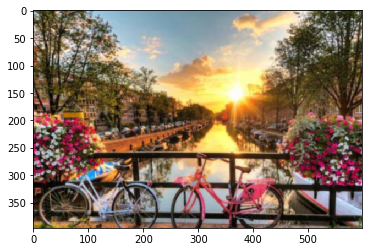

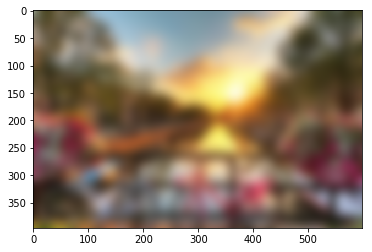

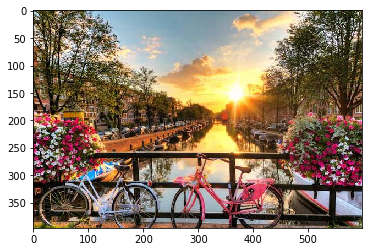

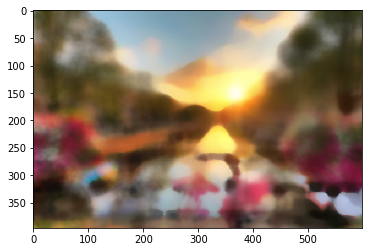

In [23]:
# We apply the same mask to the amsterdam image
face = io.imread('images/amsterdam.jpg')
face_median = face.copy()
conv_sigma_1 = gaussian(face, sigma=1, multichannel=True)
plt.imshow(conv_sigma_1)
plt.show()
conv_sigma_10 = gaussian(face, sigma=10, multichannel=True)
plt.imshow(conv_sigma_10)
plt.show()
conv_sigma_0_1 = gaussian(face, sigma=0.1, multichannel=True)
plt.imshow(conv_sigma_0_1)
plt.show()
conv_median_r = median(face[:,:,0], disk(15))
conv_median_g = median(face[:,:,1], disk(15))
conv_median_b = median(face[:,:,2], disk(15))
face_median[:,:,0] = conv_median_r
face_median[:,:,1] = conv_median_g
face_median[:,:,2] = conv_median_b
plt.imshow(face_median)
plt.show()

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Roberts.
2. Prewitt
3. Sobel
4. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

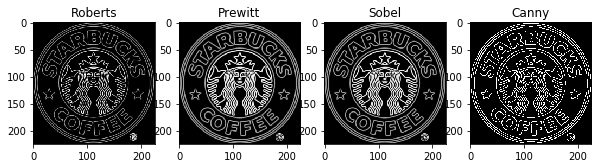

In [24]:
# Some functions are imported
import skimage.filters as filt
from skimage.feature import canny

# The logo is loaded
logo = io.imread('images/logo.png')
logo = rgb2gray(logo)

# The Roberts technique is applied
logo_roberts = filt.roberts(logo)

# The Prewitt technique is applied
logo_pre = filt.prewitt(logo)

# The Sobel technique is applied
logo_sobel = filt.sobel(logo)

# The Canny technique is applied
logo_canny = canny(logo)

# The structure for the subplots is created
f, axarr = plt.subplots(ncols=4, nrows=1,figsize=(10,5))

# The first image settings are defined
axarr[0].imshow(logo_roberts, cmap='gray')
axarr[0].set_title('Roberts')

# The second image settings are defined
axarr[1].imshow(logo_pre, cmap='gray')
axarr[1].set_title('Prewitt')

# The third image settings are defined
axarr[2].imshow(logo_sobel, cmap='gray')
axarr[2].set_title('Sobel')

# The third image settings are defined
axarr[3].imshow(logo_canny, cmap='gray')
axarr[3].set_title('Canny')

# The image is shown
plt.show()

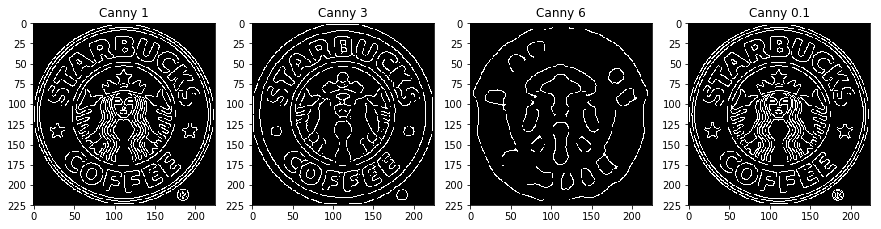

In [25]:
# The Canny technique with sigma=1 is applied
logo_canny = canny(logo)

# The Canny technique with sigma=3 is applied
logo_canny_3 = canny(logo, sigma=3)

# The Canny technique with sigma=0.1 is applied
logo_canny_0_1 = canny(logo, sigma=0.1)

# The Canny technique with sigma=6 is applied
logo_canny_6 = canny(logo, sigma=6)

# The structure for the subplots is created
f, axarr = plt.subplots(ncols=4, nrows=1,figsize=(15,10))

# The first image settings are defined
axarr[0].imshow(logo_canny, cmap='gray')
axarr[0].set_title('Canny 1')

# The second image settings are defined
axarr[1].imshow(logo_canny_3, cmap='gray')
axarr[1].set_title('Canny 3')

# The third image settings are defined
axarr[2].imshow(logo_canny_6, cmap='gray')
axarr[2].set_title('Canny 6')

# The third image settings are defined
axarr[3].imshow(logo_canny_0_1, cmap='gray')
axarr[3].set_title('Canny 0.1')

# The image is shown
plt.show()

In [26]:
solution =  '''
What is the best contour detection technique?
    - It seems that for this type of image the Prewitt and the Sobel techniques look better, but probably for
    every type of image it would change.
Which are the optimal parameters for this image?
    - It looks like the best parameters are canny with a sigma of 1.
Is it necessary to normalize the mask as we do in the filtering applied for the smoothing?
    - It is not necessary.
'''
print(solution)


What is the best contour detection technique?
    - It seems that for this type of image the Prewitt and the Sobel techniques look better, but probably for
    every type of image it would change.
Which are the optimal parameters for this image?
    - It looks like the best parameters are canny with a sigma of 1.
Is it necessary to normalize the mask as we do in the filtering applied for the smoothing?
    - It is not necessary.



b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

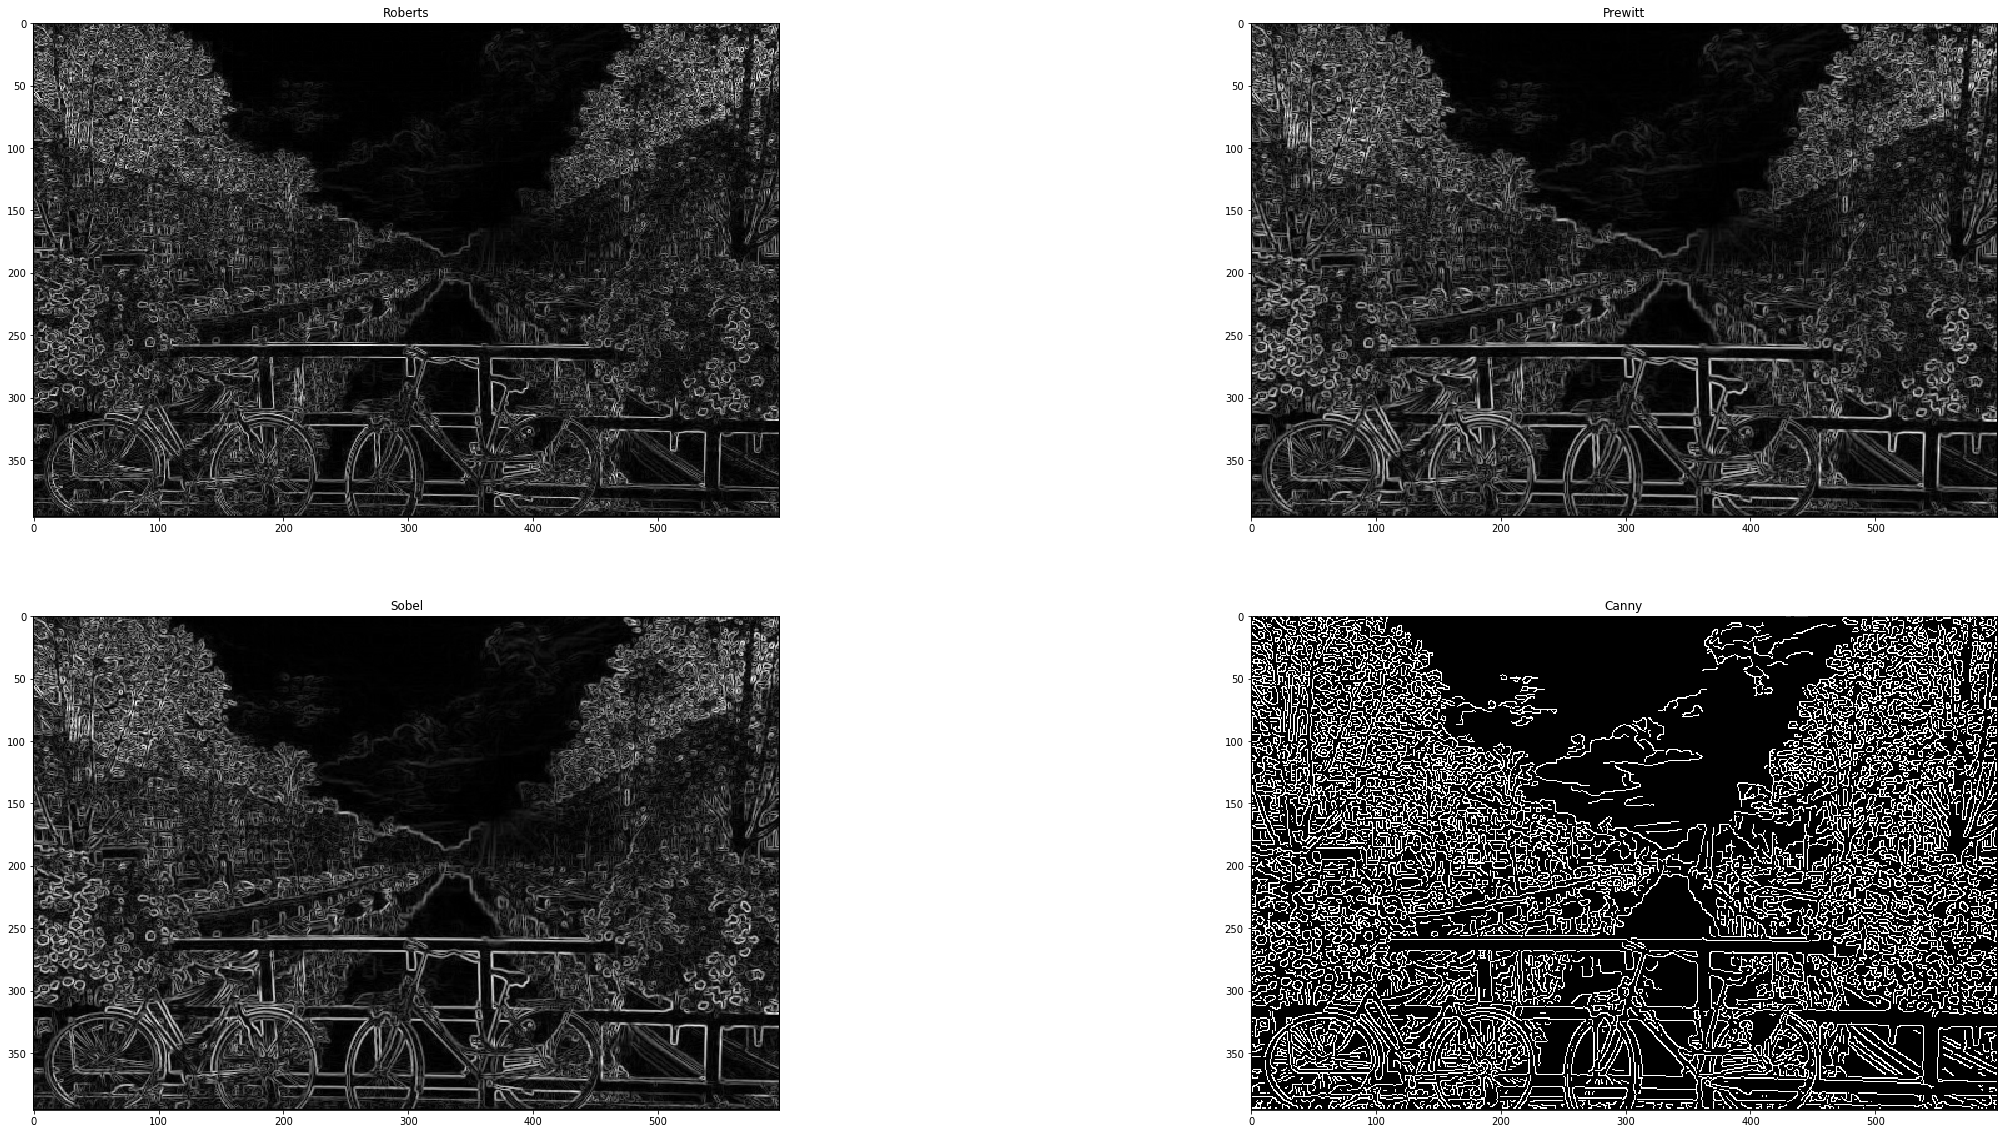

In [27]:
# The same procedure is done to the Amsterdam image (not smoothed)
logo = io.imread('images/amsterdam.jpg')
logo = rgb2gray(logo)
logo_roberts = filt.roberts(logo)

logo_pre = filt.prewitt(logo)

logo_sobel = filt.sobel(logo)

logo_canny = canny(logo)
# The structure for the subplots is created
f, axarr = plt.subplots(ncols=2, nrows=2,figsize=(40,20))

# The first image settings are defined
axarr[0][0].imshow(logo_roberts, cmap='gray')
axarr[0][0].set_title('Roberts')

# The second image settings are defined
axarr[0][1].imshow(logo_pre, cmap='gray')
axarr[0][1].set_title('Prewitt')

# The third image settings are defined
axarr[1][0].imshow(logo_sobel, cmap='gray')
axarr[1][0].set_title('Sobel')

# The third image settings are defined
axarr[1][1].imshow(logo_canny, cmap='gray')
axarr[1][1].set_title('Canny')

# The image is shown
plt.show()

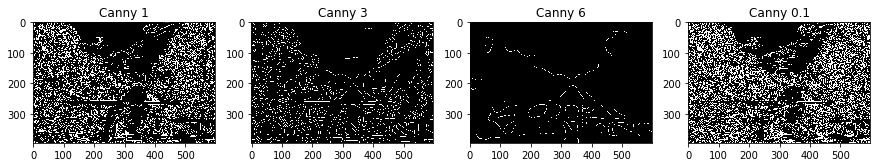

In [28]:
logo_canny = canny(logo)

logo_canny_3 = canny(logo, sigma=3)

logo_canny_0_1 = canny(logo, sigma=0.1)

logo_canny_6 = canny(logo, sigma=6)
# The structure for the subplots is created
f, axarr = plt.subplots(ncols=4, nrows=1,figsize=(15,10))

# The first image settings are defined
axarr[0].imshow(logo_canny, cmap='gray')
axarr[0].set_title('Canny 1')

# The second image settings are defined
axarr[1].imshow(logo_canny_3, cmap='gray')
axarr[1].set_title('Canny 3')

# The third image settings are defined
axarr[2].imshow(logo_canny_6, cmap='gray')
axarr[2].set_title('Canny 6')

# The third image settings are defined
axarr[3].imshow(logo_canny_0_1, cmap='gray')
axarr[3].set_title('Canny 0.1')

# The image is shown
plt.show()

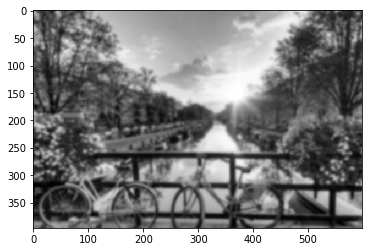

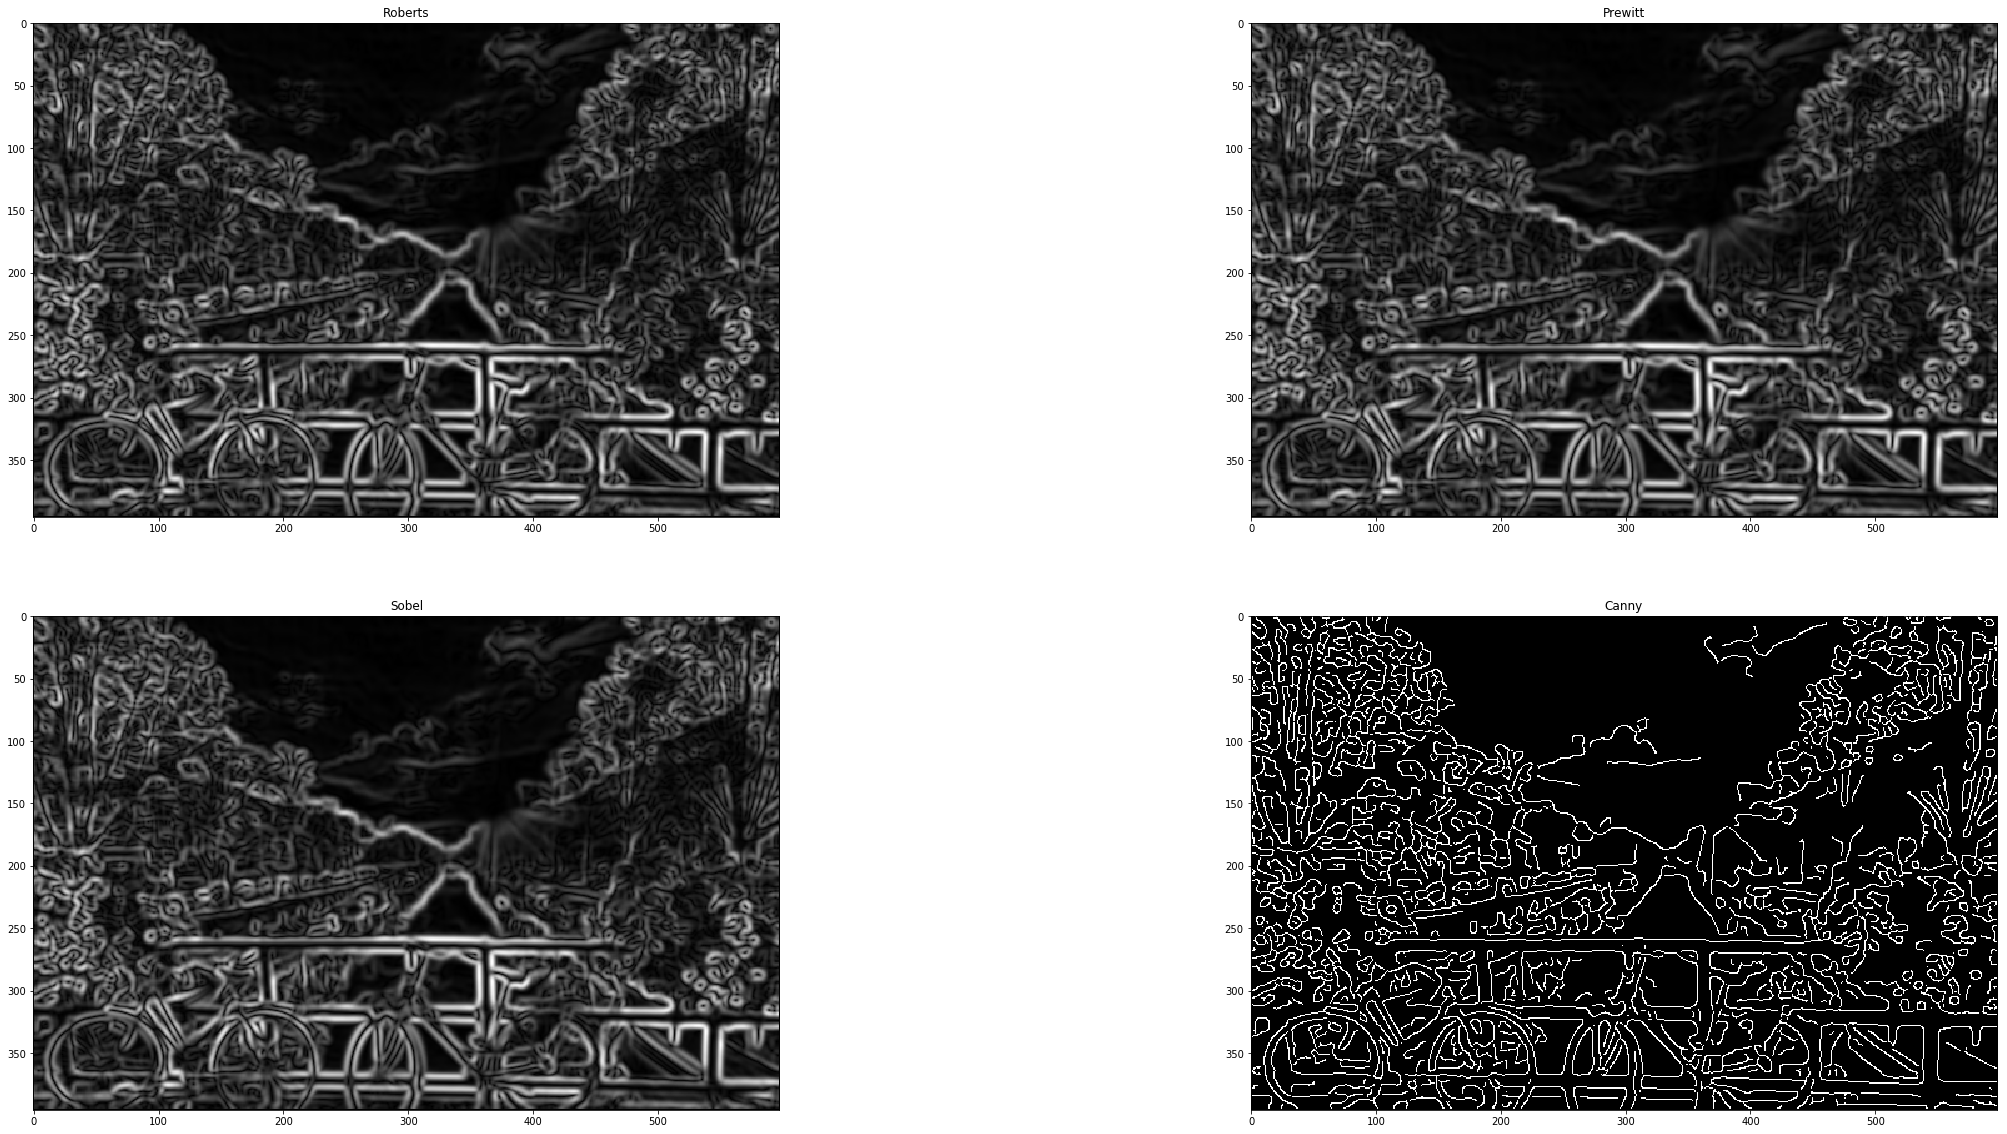

In [29]:
# The same procedure is done to the Amsterdam image (smoothed)
logo = io.imread('images/amsterdam.jpg')
logo = rgb2gray(logo)

# The image is smoothed with a gaussian mask
logo = gaussian(logo, sigma=2)

plt.imshow(logo, cmap='gray')
plt.show()

logo_roberts = filt.roberts(logo)

logo_pre = filt.prewitt(logo)

logo_sobel = filt.sobel(logo)

logo_canny = canny(logo)
# The structure for the subplots is created
f, axarr = plt.subplots(ncols=2, nrows=2,figsize=(40,20))

# The first image settings are defined
axarr[0][0].imshow(logo_roberts, cmap='gray')
axarr[0][0].set_title('Roberts')

# The second image settings are defined
axarr[0][1].imshow(logo_pre, cmap='gray')
axarr[0][1].set_title('Prewitt')

# The third image settings are defined
axarr[1][0].imshow(logo_sobel, cmap='gray')
axarr[1][0].set_title('Sobel')

# The third image settings are defined
axarr[1][1].imshow(logo_canny, cmap='gray')
axarr[1][1].set_title('Canny')

# The image is shown
plt.show()

In [30]:
solution =  '''
Are the contours improved if the image is previously smoothed?
    - We can see that with the Prewitt has improved significantly
Which are the limitations of the different images contour extraction?
    - The main problem is that every algorithm works for a type of image, there is not a 'best' algorithm
'''
print(solution)


Are the contours improved if the image is previously smoothed?
    - We can see that with the Prewitt has improved significantly
Which are the limitations of the different images contour extraction?
    - The main problem is that every algorithm works for a type of image, there is not a 'best' algorithm



c) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.



3 ways: v, h and both



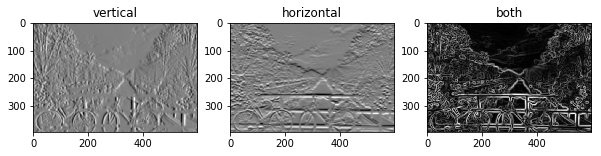

In [35]:
solution = '''
3 ways: v, h and both
'''
print (solution)

# The vertical edges are detected using the Sobel detector 
logo_sobel_v = filt.sobel_v(logo)

# The horizontal edges are detected using the Sobel detector 
logo_sobel_h = filt.sobel_h(logo)

# The structure for the subplots is created
f, axarr = plt.subplots(ncols=3, nrows=1,figsize=(10,5))

# The first image settings are defined
axarr[0].imshow(logo_sobel_v, cmap='gray')
axarr[0].set_title('vertical')

# The second image settings are defined
axarr[1].imshow(logo_sobel_h, cmap='gray')
axarr[1].set_title('horizontal')

# The third image settings are defined
axarr[2].imshow(logo_sobel, cmap='gray')
axarr[2].set_title('both')

# The image is shown
plt.show()


### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

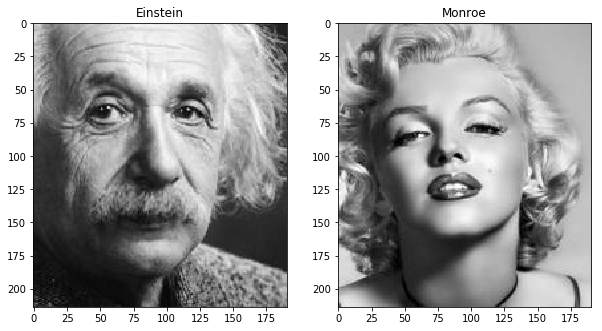

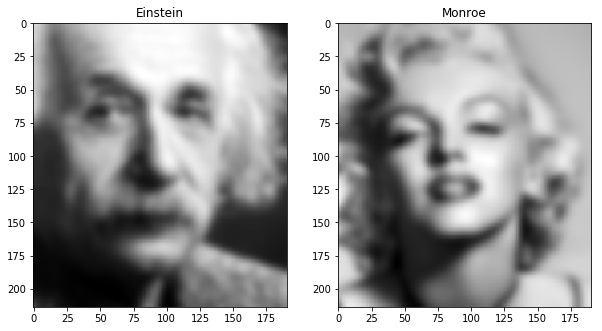

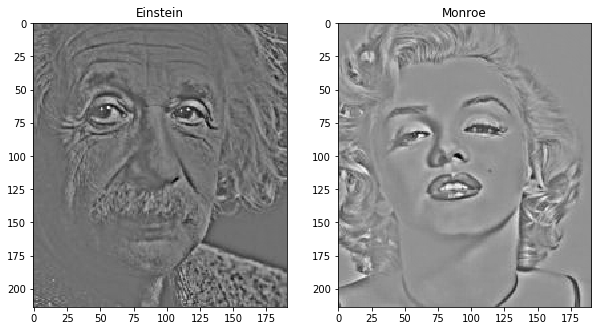

In [61]:
# The images are loaded
einstein = io.imread('images/Einstein.jpg')
monroe = io.imread('images/monroe.jpg')

# The subplots are arranged
f, axarr = plt.subplots(ncols=2, nrows=1,figsize=(10,7))

# The first image settings are defined
axarr[0].imshow(einstein, cmap='gray')
axarr[0].set_title('Einstein')

# The second image settings are defined
axarr[1].imshow(monroe, cmap='gray')
axarr[1].set_title('Monroe')
plt.show()

# The gaussian kernel is applied
conv_ein = gaussian(einstein, sigma=3)

# The result of the kernel is subtracted from the original image
ein_high = einstein - conv_ein*255

# The gaussian kernel is applied
conv_mon = gaussian(monroe, sigma=3)

# The result of the kernel is subtracted from the original image
mon_high = monroe - conv_mon*255

# The subplots are arranged
f, axarr = plt.subplots(ncols=2, nrows=1,figsize=(10,7))

# The first image settings are defined
axarr[0].imshow(conv_ein, cmap='gray')
axarr[0].set_title('Einstein')

# The second image settings are defined
axarr[1].imshow(conv_mon, cmap='gray')
axarr[1].set_title('Monroe')
plt.show()

# The subplots are arranged
f, axarr = plt.subplots(ncols=2, nrows=1,figsize=(10,7))

# The first image settings are defined
axarr[0].imshow(ein_high, cmap='gray')
axarr[0].set_title('Einstein')

# The second image settings are defined
axarr[1].imshow(mon_high, cmap='gray')
axarr[1].set_title('Monroe')
plt.show()


b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

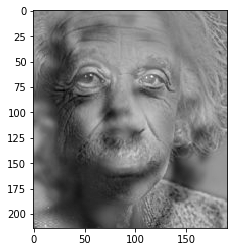

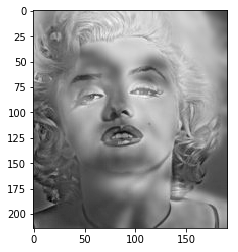

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


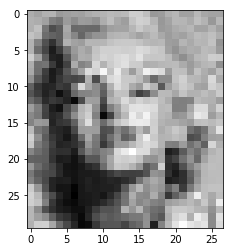

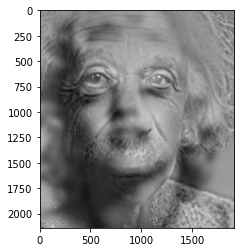

In [62]:
# The two images are added
new_im = conv_mon*255 + ein_high

# The resulting image is shown
plt.imshow(new_im, cmap='gray')
plt.show()

# The same is done but with the characters inverted
new_im_2 = conv_ein*255 + mon_high
plt.imshow(new_im_2, cmap='gray')
plt.show()

#The images are resized and shown
im_small = resize(new_im, (int(new_im.shape[0]/7), int(new_im.shape[1]/7)))
plt.imshow(im_small, cmap='gray')
plt.show()

im_big = resize(new_im, (int(new_im.shape[0]*10), int(new_im.shape[1]*10)))
plt.imshow(im_big, cmap='gray')
plt.axis
plt.show()

c) **(Optional)**

1. Apply fspecial('gaussian,hsize,sigma') with the formula hsize=4*sigma+1. What does hsize mean?
2. Compute hybrid images from other images. Apply it over color images.

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code, you do not need to implement anything.

Info about the animation:
Num Frames:200
Images height:180
Images width:320


/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>


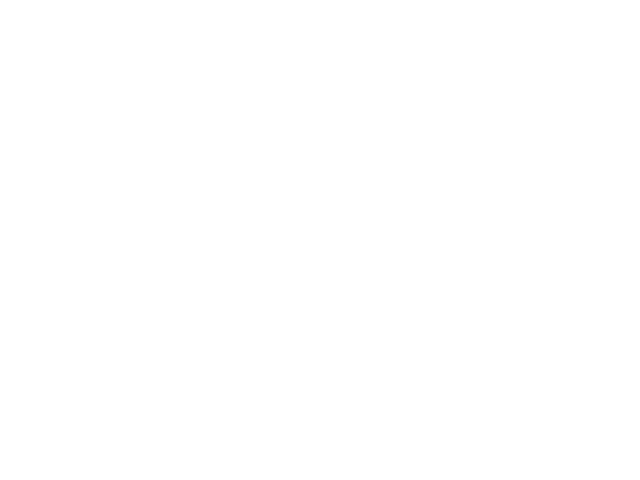

In [63]:
"""Solution, showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))


%matplotlib nbagg

def updatefig1(i): 
    #im.set_array(ic_small[:,:,:,i]) #showing the small image
    im.set_array(conv_color(ic_small[:,:,:,i], mask_2d))   
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()


Info about the animation:
Num Frames:200
Images height:180
Images width:320


/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


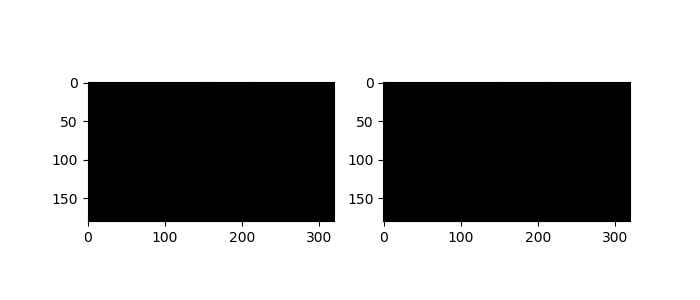

In [64]:
"""Solution, showing 2 videos per annimation : original + blurred"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))

# 
# the framesD matrix is created by 0s
#
%matplotlib nbagg
mask_2d=np.ones((7,7)) # 7 by 7 mask with all ones
mask_2d/=mask_2d.sum() 

def updfig2(i):
    imm1.set_array(ic_small[:,:,:,i]) # we plot the original image just with the resize
    imm2.set_array(conv_color(ic_small[:,:,:,i], mask_2d)) # we plot the convolved image with the mask_2d
    plt.draw()
    return imm1,imm2,

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,3))
img0=ic_small[:,:,:,0]
imm1=ax1.imshow(img0)
imm2=ax2.imshow(img0)
plt.show()
ani = animation.FuncAnimation(fig, updfig2, interval=2, 
                              blit=True, repeat=False, frames=len(ic))
plt.show()